<font size="+3"><strong>Pandas: Descriptive Statistics</strong></font>

# Descriptive Statistics 

*Descriptive statistics* are used to describe the basic features of a dataset.

## Quartiles

**Quartiles** divide a sequence of numbers into four equal parts. Grouping a dataset into quartiles helps us to find outliers, and provides the basis for the data in a boxplot. 

## Series

A **series** is a one-dimensional array that can hold any type of data. We'll generally use the term to refer to a column in a dataset that's arranged in a table. In fact, this is the reason why, in the library [pandas](https://pandas.pydata.org/), DataFrame columns are called `Series`. In a pandas Series, all items in the array must be the same data type.

## The Mean

All the data points in a dataset can be added together and then divided by the total number of data points to find the *mean*. You might be used to calling this number an *average*, but the two ideas are the same. Means help us understand the central tendency of a dataset.

## Skewed Distributions

For any given activity, there is a range of probable outcomes. All other things being equal, we would expect most of the outcomes to fall in the middle of the possible range, with the number of outcomes diminishing on either side of the peak. In statistics, this is known as a *normal distribution*, but you may have heard it called a *bell curve*, because it looks like a bell. Here's an example:

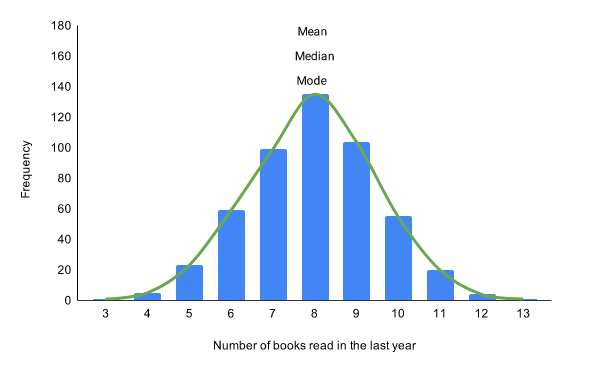

A **skewed distribution** is a type of distribution where the peak of the curve is shifted, or *skewed*, either to the right or the left of the distribution. Here's an example:

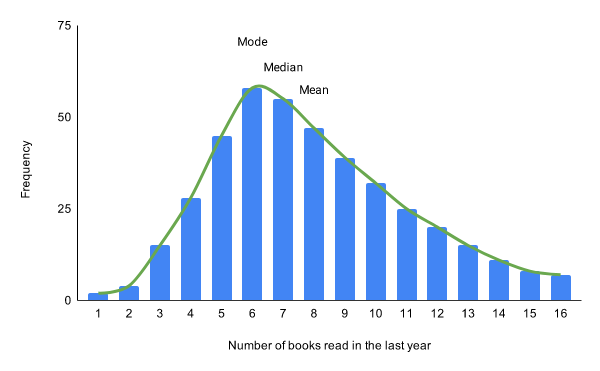

## Variance

**Variance** is a measurement of how spread out the points in a dataset are around the mean. It's calculated by first summing up the squared different between each data point and mean, then dividing by the number of data points minus 1.

$$ \textrm{Var}(X) = \frac{1}{n-1} \sum_{k=1}^n (x_k - \overline X)$$

Here's a great video that shows how to calculate variance:

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo("deIQeQzPK08", width=600)

We can get the variance for any numerical column in a DataFrame by using the `.var()` function:

In [ ]:
import pandas as pd

df = pd.read_csv("data/colombia-real-estate-1.csv")
df.head()

In [ ]:
df["area_m2"].var()

<font size="+1">Practice</font>

Get the variance of the `lat` and `lon` column.

Because variance is the squared deviation from the mean, it's heavily influenced by outliers. When the difference between the outliers and the mean are too far away from each other, the variance might not reveal the true information of how data points are distributed. In this case, we can calculate **trimmed variance** instead. Trimmed variance is the variance calculated excluding the largest and the smallest data points. Using `trimmed_var` function in the SciPy library, we can calculate the trimmed variance for a column.

In [ ]:
from scipy import stats

stats.mstats.trimmed_var(df["area_m2"])

Note the trimmed variance is much smaller than the variance.

<font size="+1">Practice</font>

Get the trimmed variance for `lat`.

## Standard Deviation

**Standard deviation** describes the proportion of records above or below the mean of a given distribution. In a normal distribution, 68% of the values fall within one standard deviation of the mean, 95% of the values fall within two standard deviations from the mean, and 99.7% of the values fall within three standard deviations from the mean. 

## Outliers

An **outlier** is a value in a dataset that falls well beyond the dataset mean —  more than three standard deviations. Depending on the analytical strategy, it might be useful to drop outliers from a dataset, because their extreme deviation from the mean can result in misleading conclusions. 

 ## Categorical Data

**Categorical data** is any type of data that can only be represented by distinct values. Eye color, handedness, and academic attainment are all categorical variables. The other kind of variable is called a *continuous variable*. Continuous variables can have an infinite number of values, whereas categorical variables have concrete values. For this reason, categorical values require special attention in statistical analysis.

## Location Data

**Location data** is information about a datapoint’s location in space, and can be expressed in latitude/longitude pairs, street address, altitude, or any other place-specific identifiers.  

## Numerical Data

**Numerical data** is any information that can be represented by numbers. 

# Summary Statistics

## Summary Statistics

**Summary statistics** are a set of simple calculations that help data scientists understand the broad strokes of their datasets. 

## Working with Summary Statistics

To calculate summary statistics in pandas, use the `describe` method. We can generate summary statistics for the `colombia-real-estate-1` dataset with code that looks like this:

In [ ]:
import pandas as pd

df1 = pd.read_csv("data/colombia-real-estate-1.csv")
df1.describe()

By default, the `describe`method will return `count`, `mean`, `standard deviations`, `minimum values`and `maximum values`. Also by default, the ignores ignores non-numerical columns.

<font size="+1">Practice</font>

Try it yourself! Using the `colombia-real-estate-2` dataset, create a DataFrame called `df2`, and print the resulting summary statistics.

In [ ]:
df2 = pd.read_csv("data/colombia-real-estate-2.csv")


# Calculate the Quantiles for a Series

Quantiles allow you to summarize the distribution of numerical values in a series. The `n'th` quantile divides an ordered series into `n` portions, each with the same number of entries. The boundaries between these portions are known as quantiles. Let's load a dataset to see how this works in practice:

In [ ]:
mexico_city2 = pd.read_csv("./data/mexico-city-real-estate-2.csv")
mexico_city2.head

To examine quantiles, let's pick the price column

In [ ]:
price = mexico_city2["price"]
price

The median is the middle entry in the ordered list of prices:

In [ ]:
price.quantile(0.5)

## Quartiles

A commonly used set of quantiles are the fourth quantiles known as quartiles. You can also find the minimum, first quartile, median, third quartile and maximum values in a series (which are typically the values used to create a boxplot):

In [ ]:
price.quantile([0, 0.25, 0.5, 0.75, 1])

*Practice* What's the 0.7 quantile in the price column of `mexico-city-real-estate-3.csv`?

In [ ]:
mexico_city3 = ...
price = ...
print(price.quantile(...))

# Correlations

**Correlations** tell us about the relationship between two sets of data. When we calculate this relationship, the result is a **correlation coefficient**. Correlation coefficients can have any value between -1 and 1. Values above 0 indicate a positive relationship (as one variable goes up, the other does too), and values below 0 indicate a negative relationship (as one variable goes up, the other goes down). The closer the coefficient's value is to either 1 or -1, the stronger the relationship is; the closer the coefficient's value is to 0, the weaker the relationship is. Coefficients equal to 0 indicate that there is no relationship between the two values, and are accordingly quite rare.

Let's run a correlation on some of the data from the `colombia-real-estate-2` dataset. We might suspect that there is some kind of relationship between the price of a property and the area it occupies, so we'll use the `Series.corr` method to figure it out. The code looks like this:

In [ ]:
area_m2 = df2["area_m2"]
price_cop = df2["price_cop"]
correlation = area_m2.corr(price_cop)
print(correlation)

The correlation coefficient here is about 0.519, which is a moderate, positive correlation. That is, as the area of a property goes up, so does the price. If the result had been a negative number, we would be able to say that as the area goes up, the price goes down.

*Practice*
Try it yourself! Find the relationship between `"area_m2"` and `"price_usd"` in the `colombia-real-estate-3` dataset, and interpret the resulting coefficient.

In [ ]:
df3 = ...
print(correlation)

# References & Further Reading

- [Brief Descriptions of Central Tendency](https://www.scribbr.com/statistics/central-tendency/)
- [Pandas Documentation on Summary Statistics](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
- [Pandas Documentation on Quantiles](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html)
- [Background on Correlations](https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/)

---
Copyright © 2022 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
